Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за качественную работу - видно, что приложено много усилий
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Тебе удалось справиться с задачей численных методов и достигнуть неплохих результатов, поздравляю!
* Отправляю проект назад, если у тебя появились вопросы. Если их нет, то можешь просто отправить проект еще раз и я его зачту.




# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Признаки:

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)

## Подготовка данных

### Загрузка библиотек

Первым шагом загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor
from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success">
<b>Успех:</b> Описание и импорты на месте

### Импорт и анализ данных

Выполним загрузку данных и первичный анализ.

In [2]:
df = pd.read_csv('/datasets/autos.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [5]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

**Вывод**

Первичный анализ данных показал:

В данных есть несколько столбцов, которые несут исключительно информативный характер и не пригодятся при обучении моделей:
- DateCrawled - дата получения информации из базы - скорее важно для аналитика, если было бы несколько итераций, в нашем кейсе не пригодится.
- RegistrationMonth - месяц регистрации автомобиля, данный параметр не столь важен, многие могут выставлять на продажу машины, которые вообще были сняты с учета.
- DateCreated - дата создания анкеты пригодилась бы при анализе рынка в целом, чтобы предсказать периоды роста и спада (но такого никогда не бывает) цен на автомобили, в нашем кейсе можно опустить.
- NumberOfPictures - важный параметр в задаче предсказания откликаемости на объявление, потому что всегда приятнее смотреть на то, что ты покупаешь, но в нашем кейсе не пригодится, потому что цена не зависит от качества фотографий и количества (если только фотограф не идет в подарок)
- PostalCode - опять же, параметр пригодится в кейсе анализа рынка, кто, где почем продает. Мы же опустим эти данные.
- LastSeen - последнее время активности пользователя пригодилось бы при предсказании надежности продавца, не пропадает ли он и ведет ли активность на сайте, но в нашем кейсе можно избавиться.

В данных есть столбцы с пропусками, которые будут использоваться в обучении, поэтому обработаем эти пропуски в дальнейшем.

Также нужно будет выполнить изменение типизации данных для обучения моделей.

<div class="alert alert-block alert-info">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) <br> P.S. Лучше пробовать локально, на платформе могут быть проблемы
    
    
    
</div>


### Обработка данных

План обработки данных:
- избавиться от лишних столбцов
- обработать пропуски

#### Избавляемся от лишних данных

Как описывали ранее, удалим из датасета столбцы с данными, которые не пригодятся при обучении моделей.

In [6]:
df = df.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis='columns')

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение

In [7]:
df.head(5)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Подготовили данные к дальнейшей работе без лишних данных.

#### Обработка пропусков

Оценим количество пропусков в данных

In [8]:
def missing_values_percentage(df):
    count=round(df.isnull().sum(),2)
    percent=round((df.isnull().sum()/df.shape[0])*100,2)
    data=pd.concat([count,percent],axis=1)
    data.reset_index(inplace=True)
    data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
    missing = data[data['Missing Values Count']!=0].sort_values(by = 'Missing Values %', ascending = False)
    display(missing)
    return missing

In [9]:
missing = missing_values_percentage(df)

,index,Missing Values Count,Missing Values %
9,NotRepaired,71154,20.08
1,VehicleType,37490,10.58
7,FuelType,32895,9.28
3,Gearbox,19833,5.60
5,Model,19705,5.56


- Признак NotRepaired о наличии ремонта является весьма весомым, поэтому отбросить 20% данных мы не можем, но также и заполнить в явном виде пропуски не получится.
- Тип автомобиля тажке может влиять на конечную цену - автобус будет дороже малолитражки
- Тип топлива, тип коробки передач и модель автомобиля - данные пропуски также будет сложно заполнить в явном виде, из-за возможного широкого диапазона комплектаций автомобилей одной и той же марки и модели в разных регионах разными коробками передач и двигателями.

Обработаем пропуски, заменив их на уникальное значение **und** - сокрещенное от **undefined**, тогда модель при обучении будет воспринимать их как отдельную категорию.

In [10]:
df.fillna(value='und', inplace=True)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,und,1993,manual,0,golf,150000,petrol,volkswagen,und
1,18300,coupe,2011,manual,190,und,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,und
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [11]:
missing_corr = missing_values_percentage(df)

,index,Missing Values Count,Missing Values %


Выполнили обработку пропусков.

**Вывод**

Проведена подготовка данных для обучения моделей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски проанализированы и заполнены допустмым способом

<div class="alert alert-block alert-info">
<b>Совет:</b> также есть подозрительные значения в данных, которые хорошо было бы как минимум проанализировать
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения. Добавил блок с обработкой аномальных значений в дате регистрации и мощностях двигателей.
</div>

<div class="alert alert-block alert-info">

<b>Совет[2]:</b> Еще хорошо было бы посмотреть price

#### Поиск аномальных значений

Построим "ящик с усами" для данных.

<AxesSubplot:>

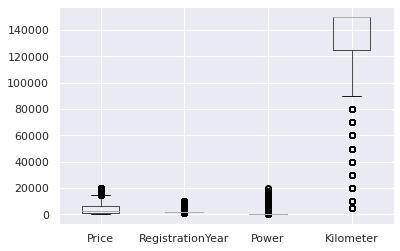

In [12]:
df.boxplot()

Разрос цены и пробега в целом можно объяснить, поэтому трогать их не будем. А вот с годом регистрации и мощностью двигателя можно поработать.

In [13]:
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Мощности под 20000 л.с. выглядят нереально, разве что кто то продает самолет, предположим, что кто-то может продавать кастомный гоночный автомобиль. Самый мощный авто на данный момент это Hennessey Venom F5 c мощностью 1600 л.с. Поэтому сделаем отсечку с запасом до 2000. 

Дата регистрации 1000 год, возможно древние цивилизации и умели строить авто с ДВС, но первые зарегистрированные авто появились в 1910-30е года, с появлением и распространением Ford Model T. Поэтому поставим отсечку по годам регистрации от 1908 (появление Model T), до 2022 года.

In [14]:
df = df.query('RegistrationYear <= 2022 and RegistrationYear >= 1908 and Power <= 2000')

<div class="alert alert-block alert-info">

<b>Совет[2]:</b> если судить по дате выгрузки баззы, то машины не могут быть младше 2016 года)

In [15]:
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,354080.000000,354080.000000,354080.000000,354080.000000
mean,4417.976155,2003.084862,107.339056,128268.823430
std,4514.301787,7.536048,71.390292,37820.986063
min,0.000000,1910.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,142.000000,150000.000000
max,20000.000000,2019.000000,2000.000000,150000.000000


<AxesSubplot:>

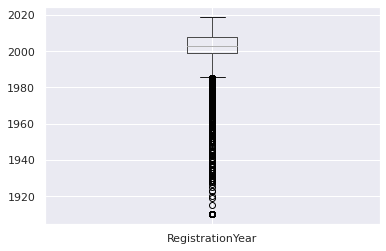

In [16]:
df.boxplot(column = 'RegistrationYear')

<AxesSubplot:>

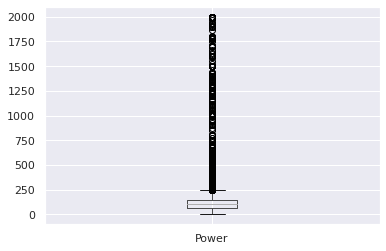

In [17]:
df.boxplot(column = 'Power')

## Обучение моделей

Выполним обучение 3х моделей:
- Linear Regression
- CatBoostRegressor
- LightGBM



### Разбиение данных на выборки

#### Категиоризация данных

Выполним кодирование методом OHE, чтобы преобразовать численные признаки в категориальные для модели линейной регрессии

In [18]:
df_ohe = pd.get_dummies(df, drop_first=True)

<div class="alert alert-block alert-success">

<b>Успех:</b>  OHE-  применен корректно

In [19]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354080 entries, 0 to 354368
Columns: 312 entries, Price to NotRepaired_yes
dtypes: int64(4), uint8(308)
memory usage: 117.5 MB


In [20]:
df_ohe.head()

,Price,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_und,NotRepaired_yes
0,480,1993,0,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,18300,2011,190,125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69,90000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Разбиение данных на выборки

Произведем разделение данных на выборки для обучения моделей. Целевой признак - price.

Выборки для линейной регрессии:

In [21]:
features_lr = df_ohe.drop(['Price'], axis = 1)
target_lr = df_ohe['Price']

Для Boost методов преобразуем в исходном датасете признаки в категориальный тип.

In [22]:
categorical = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [23]:
for col in categorical:
    df[col] = df[col].astype('category')

In [24]:
features = df.drop(['Price'], axis = 1)
target = df['Price']

In [25]:
features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(features_lr, target_lr, test_size=.25, random_state=12345)

In [26]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, random_state=12345)

### Формула для измерения метрики

По поставленной задаче нам нужно будет оценивать метрику **RMSE**, напишем функцию для ее расчета.

In [27]:
def rmse (target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse ** 0.5
    return rmse

### Обучение моделей

In [28]:
#Для сбора результатов
rmse_df = []

#### Linear Regression

In [29]:
lr_model = LinearRegression()

In [30]:
%%time
lr_model.fit(features_train_lr, target_train_lr)

CPU times: user 21.7 s, sys: 4.21 s, total: 25.9 s
Wall time: 26 s


LinearRegression()

In [31]:
%%time
predicted_lr = pd.Series(lr_model.predict(features_test_lr))

CPU times: user 97.8 ms, sys: 172 ms, total: 270 ms
Wall time: 233 ms


In [32]:
rmse_lr = rmse(target_test_lr, predicted_lr)
rmse_df.append(rmse_lr)
rmse_lr

2842.481034199925

#### CatBoost Regressor

Создадим модель CBR, попробуем подобрать для нее гиперпараметры.

Рассмотрим результаты работы при изменении гиперпараметра itearations

In [33]:
iteration_it = []
score_it = []
score_mean_it = []

for iteration in range(10, 111, 1):
    cat_model = CatBoostRegressor(loss_function="RMSE", iterations=iteration, depth=10, verbose=10, cat_features=categorical)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=2)
    #print("Score при iterations =", iteration, ":", cat_cv)
    mean_score = sum(cat_cv)/len(cat_cv)
    #print("Score mean =", mean_score)
    #print()
    iteration_it.append(iteration)
    score_it.append((cat_cv))
    score_mean_it.append(mean_score)

Learning rate set to 0.5
0:	learn: 3149.8174657	total: 142ms	remaining: 1.28s
9:	learn: 1908.6640697	total: 844ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3137.7899746	total: 77.9ms	remaining: 701ms
9:	learn: 1900.9392030	total: 763ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3149.8174657	total: 84.2ms	remaining: 842ms
10:	learn: 1891.3275843	total: 850ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3137.7899746	total: 78.7ms	remaining: 787ms
10:	learn: 1884.2320978	total: 832ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3149.8174657	total: 86.1ms	remaining: 948ms
10:	learn: 1891.3275843	total: 845ms	remaining: 76.8ms
11:	learn: 1879.9131312	total: 920ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3137.7899746	total: 81.3ms	remaining: 894ms
10:	learn: 1884.2320978	total: 844ms	remaining: 76.7ms
11:	learn: 1861.7505994	total: 919ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3149.8174657	total: 85.9ms	remaining: 1.03s
10:	learn: 1891.3275843	tota

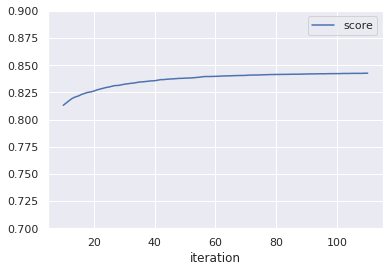

In [34]:
df_results_iterations = pd.DataFrame({'iteration':iteration_it, 'score':score_mean_it})
#display(df_results)

df_results_iterations.plot(x = 'iteration', y = 'score')
plt.ylim(0.7, 0.9)
plt.show()

Теперь рассмотрим результаты работы при изменении гиперпараметра depth

In [35]:
depth_d = []
score_d = []
score_mean_d = []

for depth in range(1, 35, 1):
    cat_model = CatBoostRegressor(loss_function="RMSE", iterations=20, depth=depth, verbose=10, cat_features=categorical)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=2)
    #print("Score при depth =", depth, ":", cat_cv)
    #print("Score mean =", sum(cat_cv)/len(cat_cv))
    #print()
    depth_d.append(depth)
    mean_score = sum(cat_cv)/len(cat_cv)
    score_d.append(cat_cv)
    score_mean_d.append(mean_score)

Learning rate set to 0.5
0:	learn: 3998.9778204	total: 25.9ms	remaining: 492ms
10:	learn: 2803.6723510	total: 229ms	remaining: 187ms
19:	learn: 2567.0261892	total: 386ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3967.1993046	total: 25.5ms	remaining: 484ms
10:	learn: 2785.4799466	total: 224ms	remaining: 183ms
19:	learn: 2552.3320734	total: 387ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3680.6315463	total: 32.2ms	remaining: 612ms
10:	learn: 2394.7360896	total: 318ms	remaining: 260ms
19:	learn: 2275.6706617	total: 543ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3647.9421475	total: 31.5ms	remaining: 598ms
10:	learn: 2398.6832459	total: 295ms	remaining: 242ms
19:	learn: 2261.4383669	total: 525ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3550.8796137	total: 37.5ms	remaining: 712ms
10:	learn: 2261.8010053	total: 354ms	remaining: 290ms
19:	learn: 2141.0013876	total: 614ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 3518.8745819	total: 35ms	remaining: 665m

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 5299, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 2021, in _fit
    train_params = self._prepare_train_params(
  File "/opt/conda/lib/python3.9/site-packages/catboost/core.py", line 1953, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 5839, in _catboost._check_train_params
  File "_catboost.pyx", line 5858, in _catboost._check_train

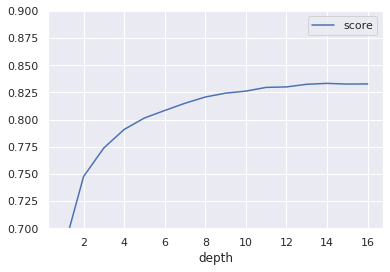

In [36]:
df_results_depth = pd.DataFrame({'depth':depth_d, 'score':score_mean_d})
#display(df_results)

df_results_depth.plot(x = 'depth', y = 'score')
plt.ylim(0.7, 0.9)
plt.show()

По результатам варьирования гиперпараметров можно резюмировать следующее:

- увеличение числа итераций дает увеличение точности модели, но при этом увеличивается и скорость обучения
- разница между 85 и 110 итерациями не столь велика, чтобы жертвовать скоростью обучения
- аналогичная картина при увеличении глубины - точность растет, но постепенно зависимость точности от глубины выходит на "полку" и увеличение глубины не дает бОльшего прироста в точности.

Оптимальным смотрится диапазон изменения количества итераций от 80 до 90, глубина 12.

In [37]:
cat_model_optimum= CatBoostRegressor(loss_function="RMSE", iterations=85, depth=12, verbose=10)

In [38]:
%%time 
cat_model_optimum.fit(features_train, target_train, cat_features=categorical)

Learning rate set to 0.5
0:	learn: 3108.1511043	total: 228ms	remaining: 19.1s
10:	learn: 1820.9513719	total: 2.31s	remaining: 15.6s
20:	learn: 1729.8314940	total: 5s	remaining: 15.2s
30:	learn: 1661.0006761	total: 7.09s	remaining: 12.4s
40:	learn: 1609.8955000	total: 9.22s	remaining: 9.89s
50:	learn: 1569.9474878	total: 11.5s	remaining: 7.65s
60:	learn: 1535.3640776	total: 13.6s	remaining: 5.34s
70:	learn: 1508.4824352	total: 15.7s	remaining: 3.09s
80:	learn: 1486.6361098	total: 17.8s	remaining: 879ms
84:	learn: 1479.7005790	total: 18.6s	remaining: 0us
CPU times: user 18.9 s, sys: 94.7 ms, total: 19 s
Wall time: 19.8 s


In [39]:
%%time
predicted_cat_optimum = pd.Series(cat_model_optimum.predict(features_test))

CPU times: user 83.2 ms, sys: 7.89 ms, total: 91.1 ms
Wall time: 88.8 ms


In [40]:
rmse_cbr = rmse(target_test, predicted_cat_optimum)
rmse_df.append(rmse_cbr)
rmse_cbr

1747.3527337723717

#### LightGBM

Попробуем поподбирать разные параметры для LGBM

Начнем с типа буста.

In [41]:
boosting_type = ['gbdt', 'dart', 'goss']
results_bt = []

for bt in boosting_type:
    lgbm_model = LGBMRegressor(boosting_type = bt, objective = 'regression', metric = 'rmse', max_depth = 4, 
    learning_rate = 0.1,
    verbose = 0,
    num_leaves = 31)
    lgbm_model.fit(features_train, target_train)
    predictions_lgbm = lgbm_model.predict(features_test)
    rmse_lgbm_test = rmse(target_test, predictions_lgbm)
    #print(rmse_lgbm_test)
    results_bt.append(rmse_lgbm_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.393227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [42]:
dict_lgbm = {'bt': boosting_type, 'rmse': results_bt}
results_lgbm = pd.DataFrame(dict_lgbm)
results_lgbm

,bt,rmse
0,gbdt,1860.934581
1,dart,2077.680986
2,goss,1864.401835


Лучший результат показывает буст **gbdt**

Попробуем поварьировать максимальную глубину.

In [43]:
depths = []
results_depth = []

for depth in range(1, 20, 2):
    lgbm_model = LGBMRegressor(boosting_type = 'gbdt', objective = 'regression', metric = 'rmse', max_depth = depth, 
    learning_rate = 0.1,
    verbose = 0,
    num_leaves = 31)
    lgbm_model.fit(features_train, target_train)
    predictions_lgbm = lgbm_model.predict(features_test)
    rmse_lgbm_test = rmse(target_test, predictions_lgbm)
    #print(rmse_lgbm_test)
    results_depth.append(rmse_lgbm_test)
    depths.append(depth)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.305380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.395166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits wit

In [44]:
dict_lgbm_depth = {'depth': depths, 'rmse': results_depth}
results_lgbm_depth = pd.DataFrame(dict_lgbm_depth)
results_lgbm_depth

,depth,rmse
0,1,2498.672052
1,3,1943.836326
2,5,1804.040411
3,7,1780.358599
4,9,1776.672975
5,11,1773.158461
6,13,1774.851020
7,15,1775.179208
8,17,1775.179208
9,19,1775.179208


С увеличением глубины метрика качества не улучшается после значения 11.

In [45]:


params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 11, 
    'learning_rate': 0.1,
    'verbose': 0,
    'num_leaves': 31, 
}

In [46]:
lgbm_model = LGBMRegressor(**params)

In [47]:
%%time
lgbm_model.fit(features_train, target_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.385065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
CPU times: user 5min 51s, sys: 3.36 s, total: 5min 54s
Wall time: 5min 56s


LGBMRegressor(max_depth=11, metric='rmse', objective='regression', verbose=0)

In [48]:
%%time
predictions_lgbm = lgbm_model.predict(features_test)

CPU times: user 961 ms, sys: 0 ns, total: 961 ms
Wall time: 979 ms


In [49]:
rmse_lgbm = rmse(target_test, predictions_lgbm)
rmse_df.append(rmse_lgbm)
rmse_lgbm

1773.1584607781417

## Анализ моделей

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения. После фильтрации аномальных значений еще улучшилось время работы CBR и LR, но сильно просело время обучения у LGBM. Так что теперь вывод смотрится более однозначным - CBR приоритетный вариант для использования.
</div>

<div class="alert alert-block alert-success">

<b>Успех[2]:</b> Есть контакт

In [51]:
model = ['LR', 'CBR', 'LGBM']
time_to_learn = [26, 19.8, 356]
time_to_predict = [233, 88.8, 979]

dict = {'model': model, 'time_to_learn, s': time_to_learn, 'time_to_predict, ms': time_to_predict, 'rmse': rmse_df} 
    
results = pd.DataFrame(dict)
results

,model,"time_to_learn, s","time_to_predict, ms",rmse
0,LR,26.0,233.0,2842.481034
1,CBR,19.8,88.8,1747.352734
2,LGBM,356.0,979.0,1773.158461


**Вывод**

- В рамках работы были оценены 3 варианта модели машинного обучения - линейная регрессия, как представитель стандартной модели и CatBoost и LightGBM как представители буст моделей.
- Линейная регрессия показывает низкие результаты как по скорости обучения и предсказания, так и по метрике RMSE; CBR чуть дольше обучается, но зато заметно быстрее выдает предсказания и имеет лучшее значение метрики rmse; LGBM обучается быстрее всех, но имеет бОльшее время предсказания и второй показатель по метрике rmse.
- Для работы рекомендуется использовать модель CatBoostRegressor как некий оптимум между скоростью работы и качеством предсказаний, поскольку единожды обучив модель, можно будет ей продолжать пользоваться, получая прирост скорости предсказания.

<div class="alert alert-block alert-success">
    
<b>Успех:</b> Хорошо проделаны шаги!<br> Радует достаточное количество рассмотренных моделей и то, что был попробован внутренний метод кодировки данных <br> Все нужные метрики успешно вычислены и проанализированы    <br> Приятно видеть информативную таблицу



<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..
    


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей